# loading  the white wine and red wine datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


print("hellow world")

hellow world


In [3]:
# Load the red and white wine datasets from CSV files
# 'red.csv' contains data about red wine and 'white.csv' contains data about white wine.
red_wine = pd.read_csv('../../data/wine/red.csv')
white_wine = pd.read_csv('../../data/wine/white.csv')


# Combine data from both files and add color column, fill NaN values wiht mean value

In [4]:
# Add a 'color' column to distinguish between wine types in the combined dataset
# Assign '0' for red wine and '1' for white wine to help in binary classification later
red_wine['color'] = 0  # 0 represents red wine
white_wine['color'] = 1  # 1 represents white wine

# Combine the red and white wine datasets into a single dataset for processing
# Ignore the original indices to create a new unified index
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Handle missing values by replacing them with the mean of their respective columns
# This ensures that missing data does not negatively affect the training of the model
wine_data.fillna(wine_data.mean(), inplace=True)

# Plot Histogram of data

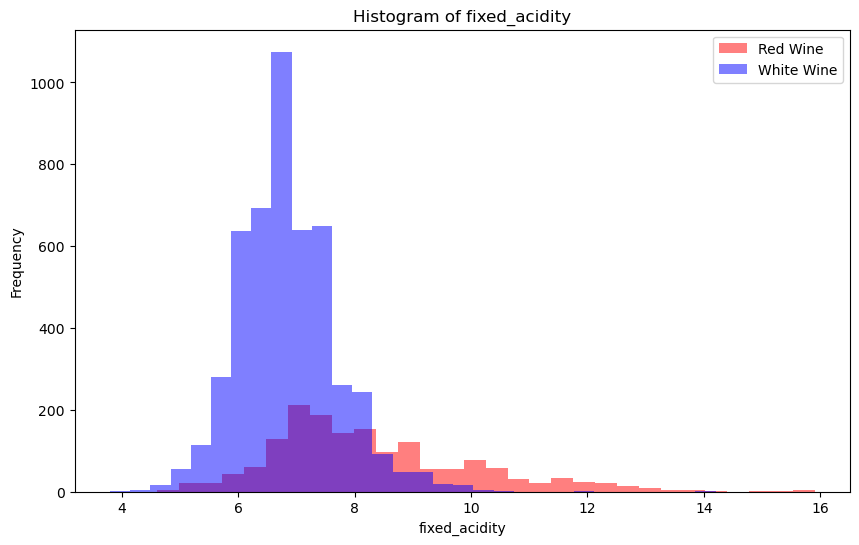

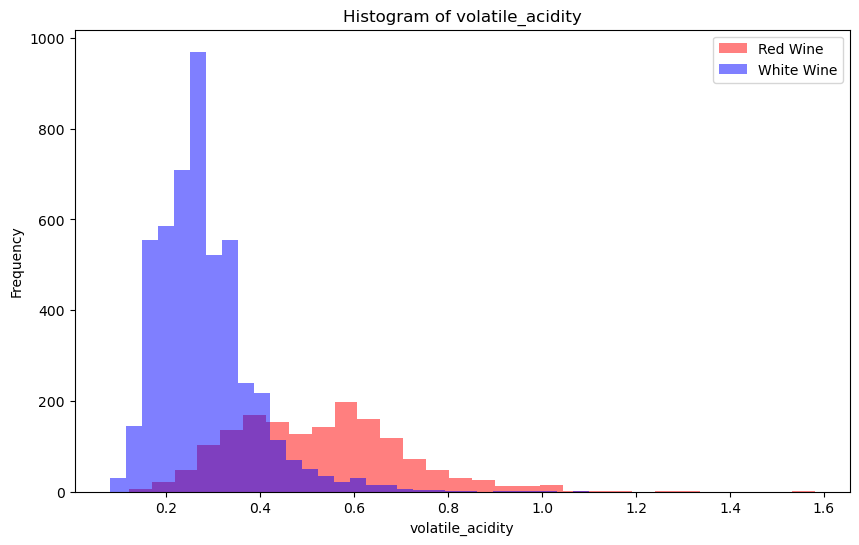

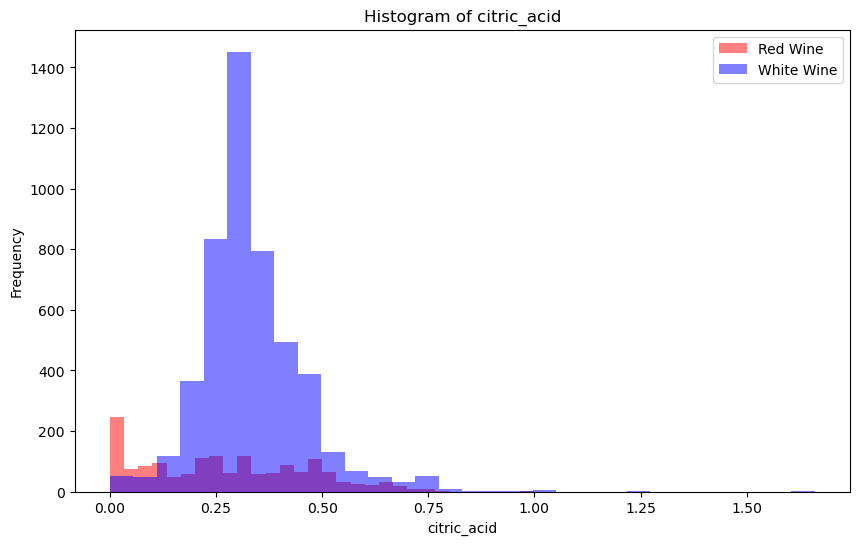

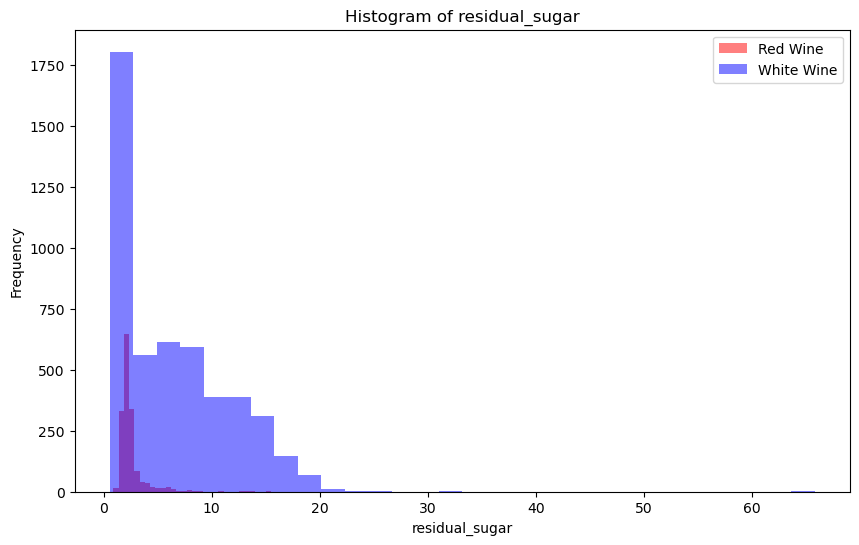

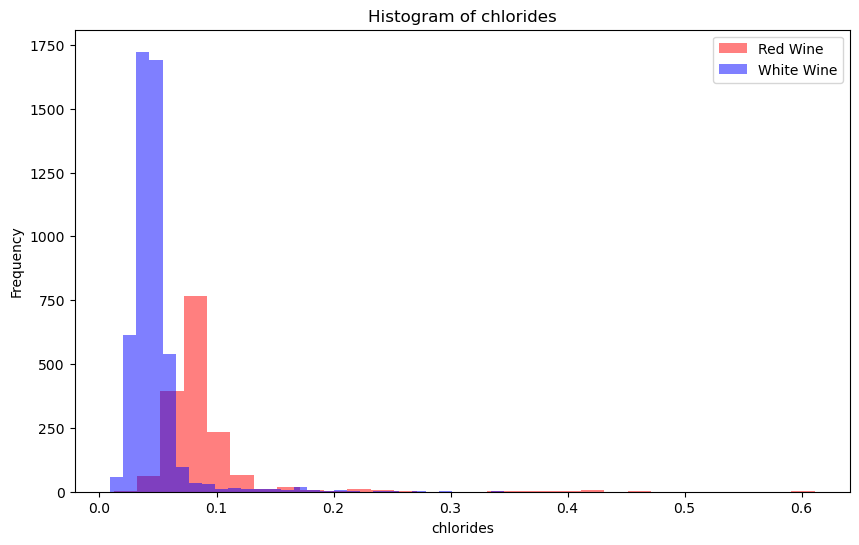

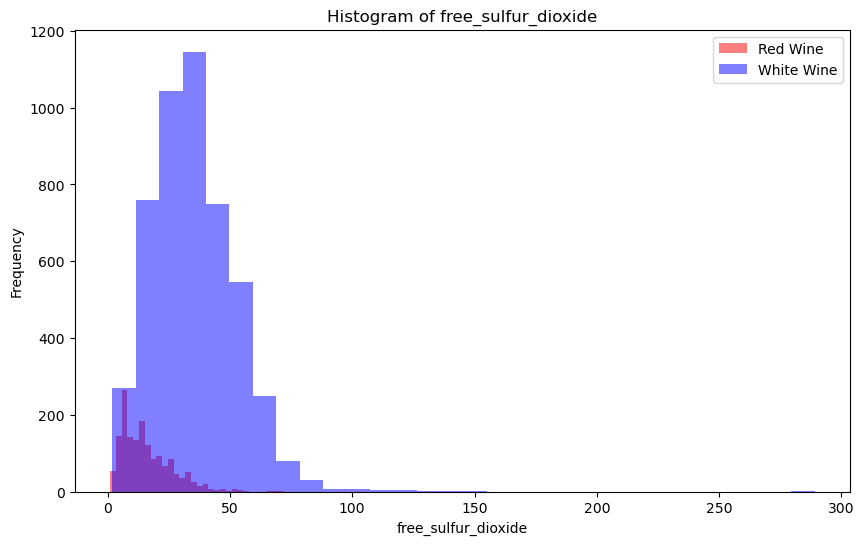

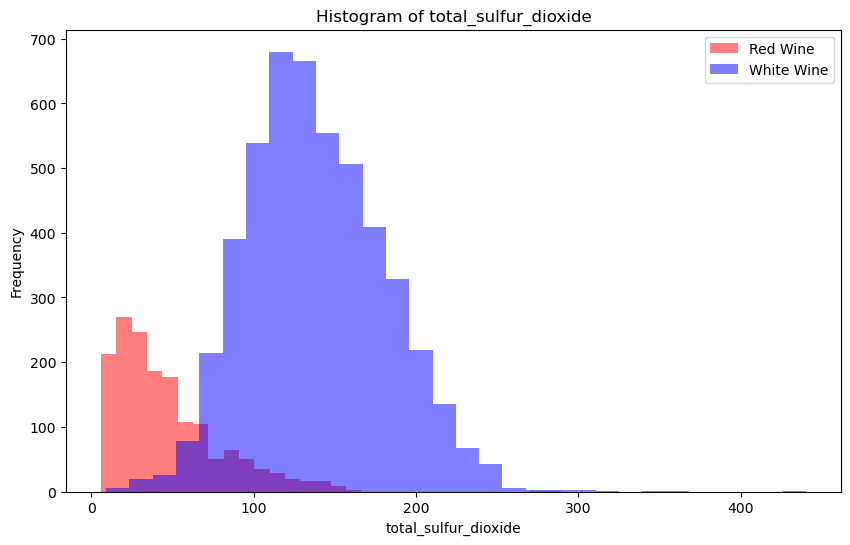

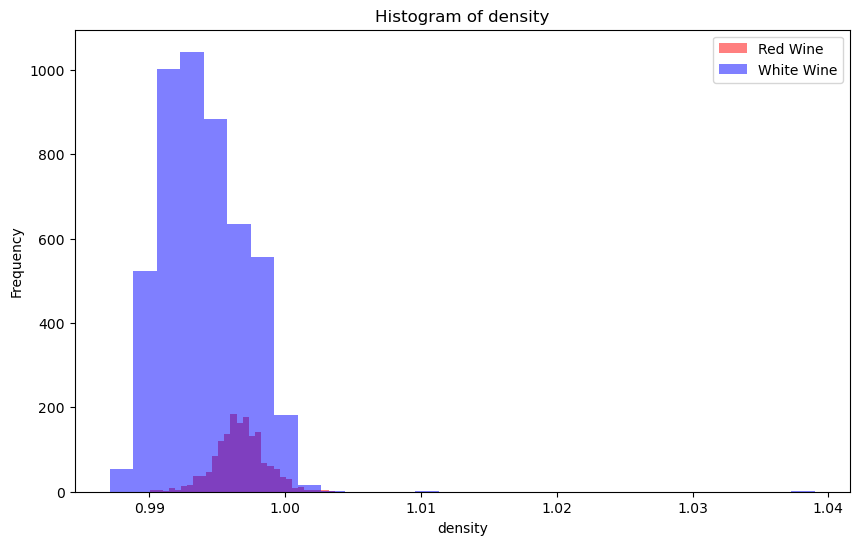

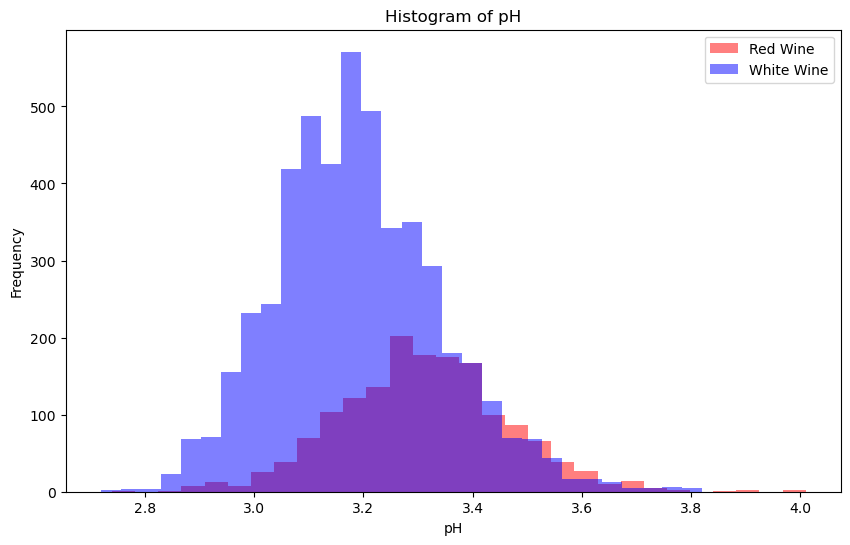

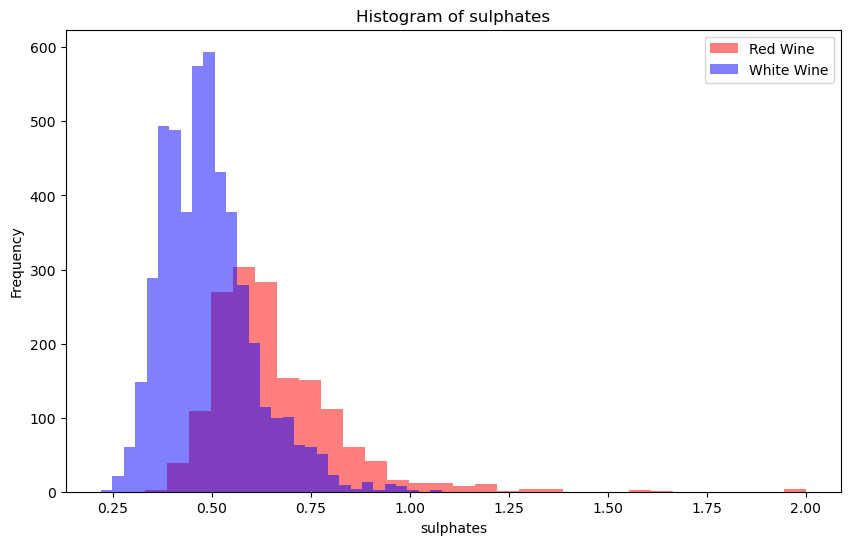

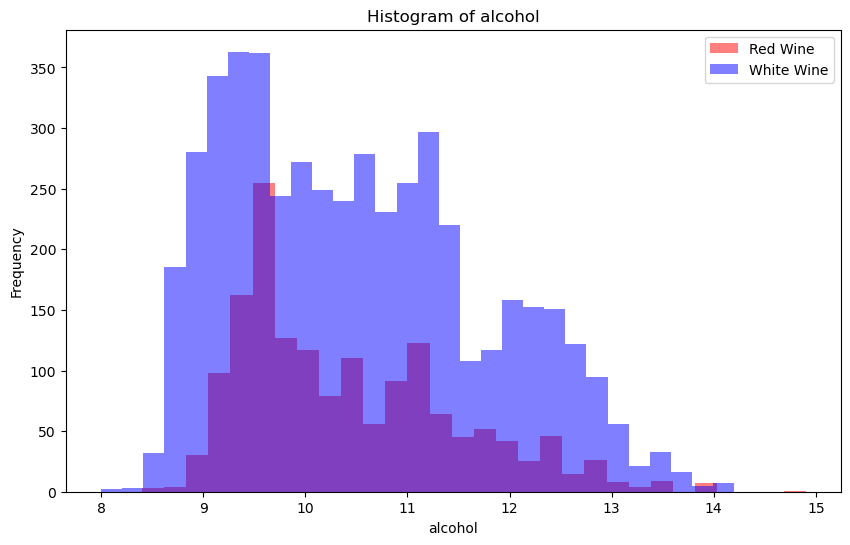

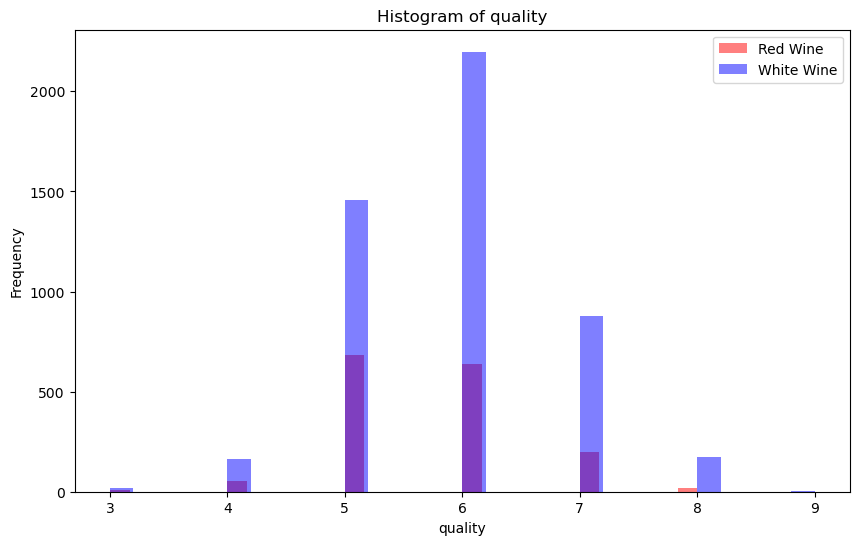

In [5]:
# Iterate over each column (excluding 'color') to plot histograms
for column in wine_data.columns:
    if column != 'color':  # Skip the 'color' column
        plt.figure(figsize=(10, 6))
        
        # Plot the histogram for red wine
        red_wine[column].plot(kind='hist', bins=30, alpha=0.5, color='red', label='Red Wine')
        
        # Plot the histogram for white wine
        white_wine[column].plot(kind='hist', bins=30, alpha=0.5, color='blue', label='White Wine')
        
        # Add labels, title, and legend
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        
        # Save the plot as a PNG file
        plt.savefig(f'{column}_histogram.png')
        
        # Display the plot
        #plt.show()  #uncomment to see histograms here

# Prepare training data (X) and labels (Y), labels can be color or wine quality

In [6]:
# Define the target column for classification
# The target can either be 'color' for binary classification (red vs. white wine)
# or 'quality' for multi-class classification (wine quality on a numeric scale)
target_column = 'quality'  # Change to 'quality' if multi-class classification is desired

# Separate features (X) and target (y)
# The features are all columns except 'color' and 'quality', depending on the target
# The target is the column defined above, either 'color' or 'quality'
X = wine_data.drop(columns=['color', 'quality'])
y = wine_data[target_column]

# Standardize the features to bring them to the same scale
# This helps the neural network model to converge faster and more reliably
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
# A random state is used for reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create Classifier and apply to test data

In [7]:
# Define the classifiers to be used and their names
classifiers = {
    "Neural Network (MLPClassifier)": MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Naive Bayes": GaussianNB(var_smoothing=1e-7),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}

# Loop through classifiers and evaluate each one
results = []
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    # Store the results
    results.append({"Classifier": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1})


# Compare predicted labels with grount truth labels 


Comparison of Classifiers:

Neural Network (MLPClassifier): Accuracy = 0.59, Precision = 0.60, Recall = 0.59, F1 Score = 0.59
Random Forest: Accuracy = 0.67, Precision = 0.68, Recall = 0.67, F1 Score = 0.66
Gradient Boosting: Accuracy = 0.63, Precision = 0.63, Recall = 0.63, F1 Score = 0.62
Logistic Regression: Accuracy = 0.54, Precision = 0.50, Recall = 0.54, F1 Score = 0.50
Naive Bayes: Accuracy = 0.47, Precision = 0.49, Recall = 0.47, F1 Score = 0.46
Support Vector Machine: Accuracy = 0.56, Precision = 0.53, Recall = 0.56, F1 Score = 0.52


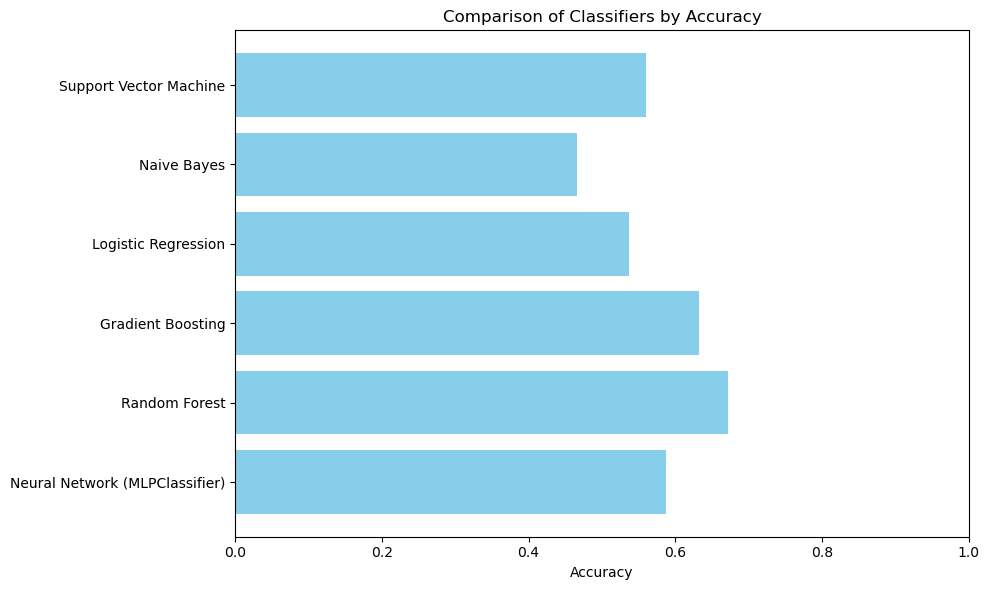

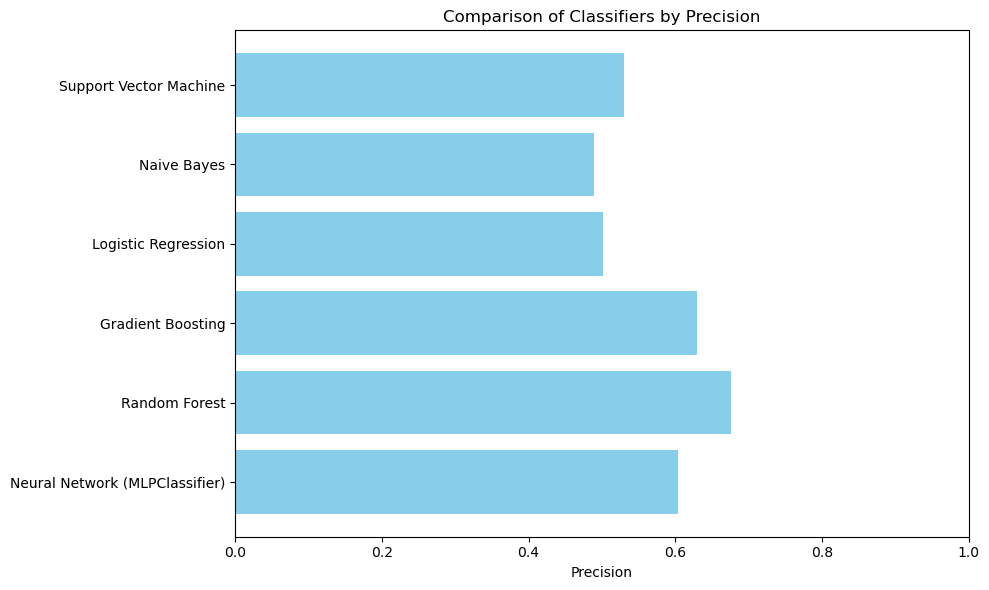

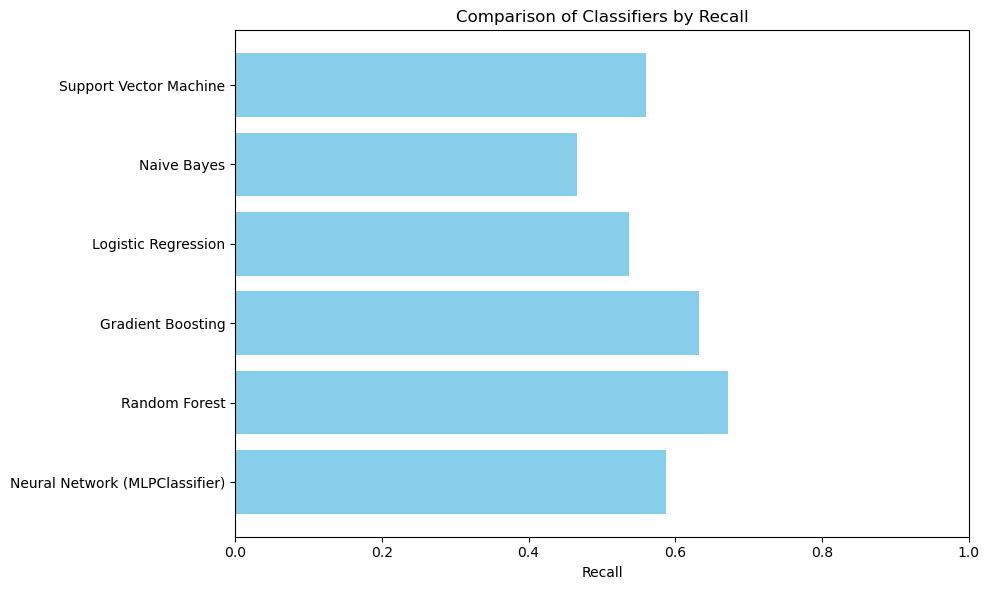

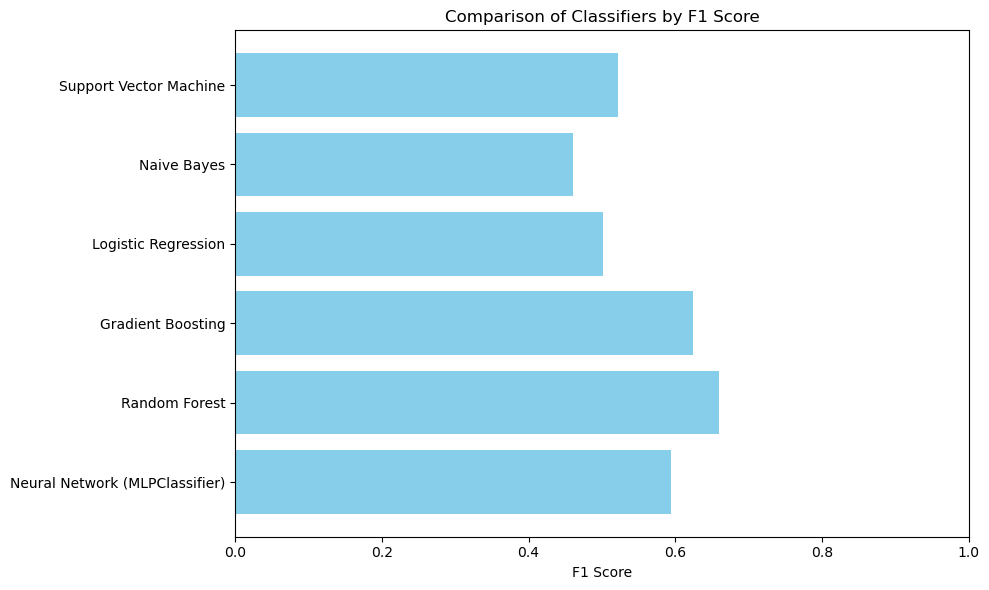

In [8]:
# Display the results
print("\nComparison of Classifiers:\n")
for result in results:
    print(f"{result['Classifier']}: Accuracy = {result['Accuracy']:.2f}, Precision = {result['Precision']:.2f}, Recall = {result['Recall']:.2f}, F1 Score = {result['F1 Score']:.2f}")

# Plot histograms for accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    values = [result[metric] for result in results]
    names = [result['Classifier'] for result in results]
    plt.barh(names, values, color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Comparison of Classifiers by {metric}')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.savefig(f'{metric.lower()}_comparison.png')
    plt.show()